# Problem 

My solution to Titanic problem: [Kaggle competition](https://www.kaggle.com/competitions/titanic)

## Project structures

- Notebook: `./main.ipynb`
- Inputs: `./data/input/`: import your data (`train.csv` and `test.csv` here)
- Output: `./data/output/`: output your solution (`submission.csv`) here
- Visualisations: `./data/visualization/`: output your visualization image here (if any)



## Setup code

Run this code snippet below to:

1. Import all libraries used
2. Import train and test data set

In [1]:
import pandas as pd

# Import data from csv
train_file_path = "./data/input/train.csv"
test_file_path = "./data/input/test.csv"
output_file_path = "./data/output/submission.csv"

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

potential_features = train_data.columns.tolist()
potential_features.remove("PassengerId") # The ID is obviously unrelated
potential_features.remove("Survived") # This is our prediction targets
prediction_target = "Survived"

print(f"Setup complete: train_size {train_data.index.size}, test_size {test_data.index.size}")
print(f"features: {potential_features}")
print(f"Prediction target: {prediction_target}")

Setup complete: train_size 891, test_size 418
features: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Prediction target: Survived


## Exploratory Data Analysis

Start explore our data 

In [56]:
# EDA 
def explore_data_type(df: pd.DataFrame): 
    # First, copy the data frame 
    data = df.copy()

    # Print all the unique value on each columns to see if they are numerical, categorical, continues values
    print("col - type - unique value - total missing/Nan")
    for col in potential_features:
        print(f"{col} - {data[col].dtype} - {data[col].nunique()} - {data[col].isna().sum()}")


explore_data_type(train_data)

col - type - unique value - total missing/Nan
Pclass - int64 - 3 - 0
Name - object - 891 - 0
Sex - object - 2 - 0
Age - float64 - 88 - 177
SibSp - int64 - 7 - 0
Parch - int64 - 7 - 0
Ticket - object - 681 - 0
Fare - float64 - 248 - 0
Cabin - object - 147 - 687
Embarked - object - 3 - 2


As we can see with the above results: 

- `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` are categorible
- `Age`, `Fare` are continuous values
- All the `name` are unique value (891 names, equal to the number of rows in the train set)

Next, we'll plot some visualization to see the relationships and data distributions of these values: 

- We use `kdeplot` for data distribution on continuouse values, `histplot` for categorical values
- We use `scatterplot` for continuous values 
- We use `swarmplot` for categorical values

Pclass distribution visualization complete
Pclass relationship visualization complete
Sex distribution visualization complete
Sex relationship visualization complete
SibSp distribution visualization complete
SibSp relationship visualization complete
Parch distribution visualization complete
Parch relationship visualization complete
Embarked distribution visualization complete
Embarked relationship visualization complete
Age distribution visualization complete
Age relationship visualization complete
Fare distribution visualization complete
Fare relationship visualization complete


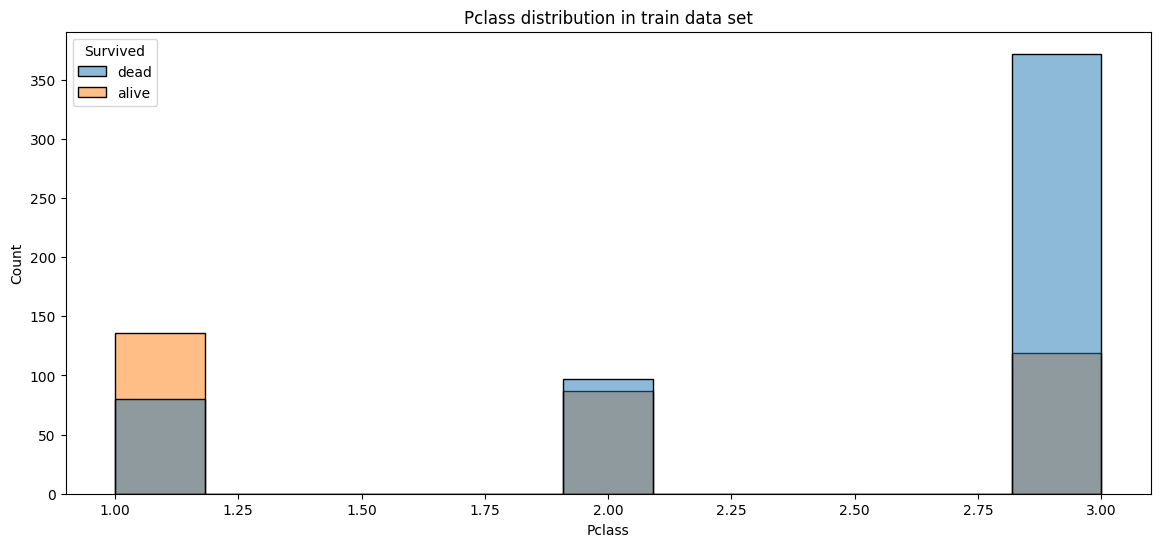

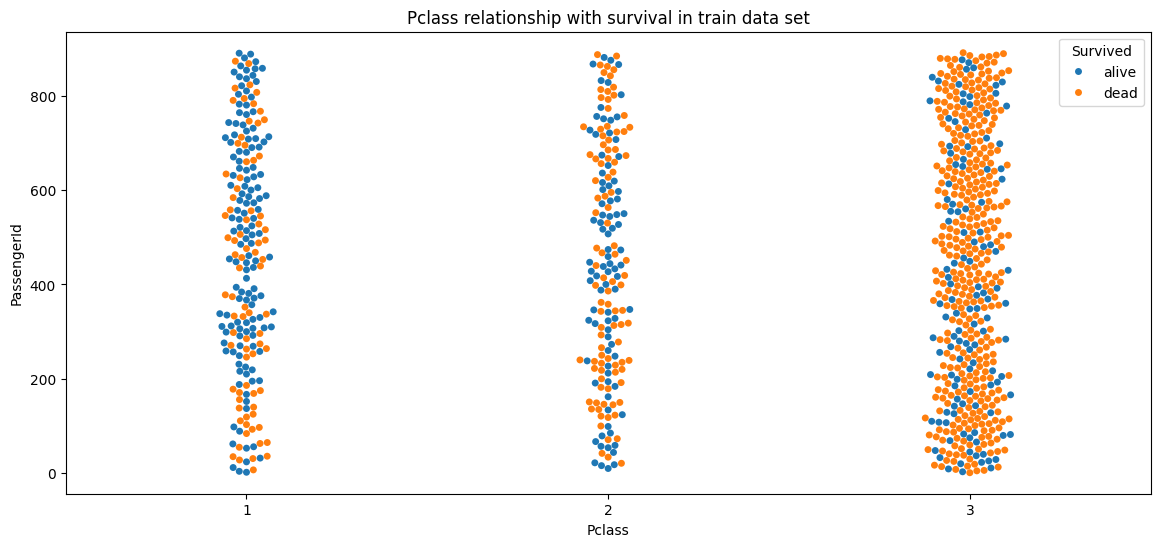

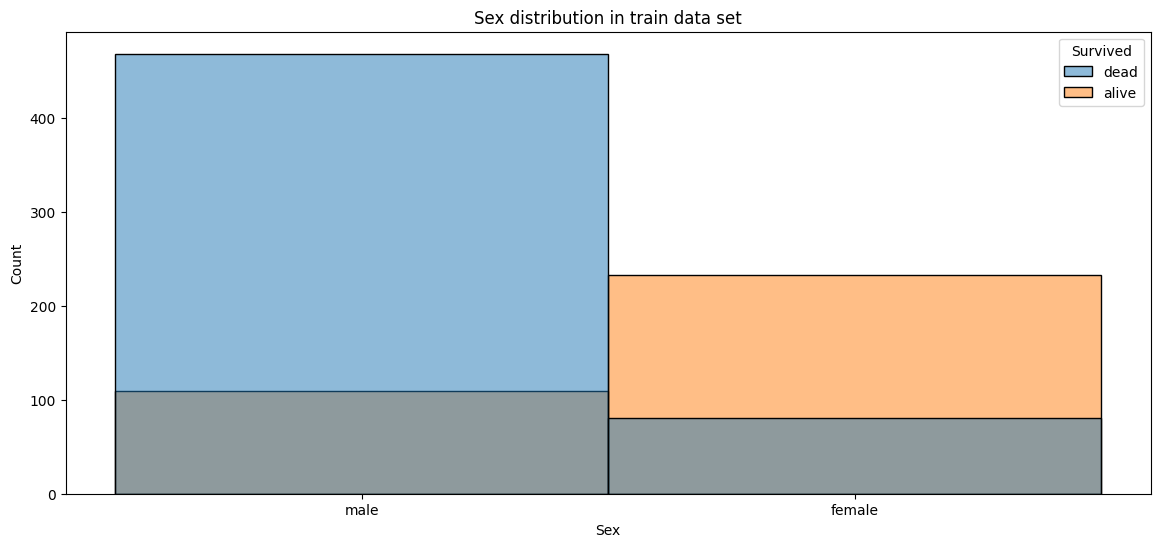

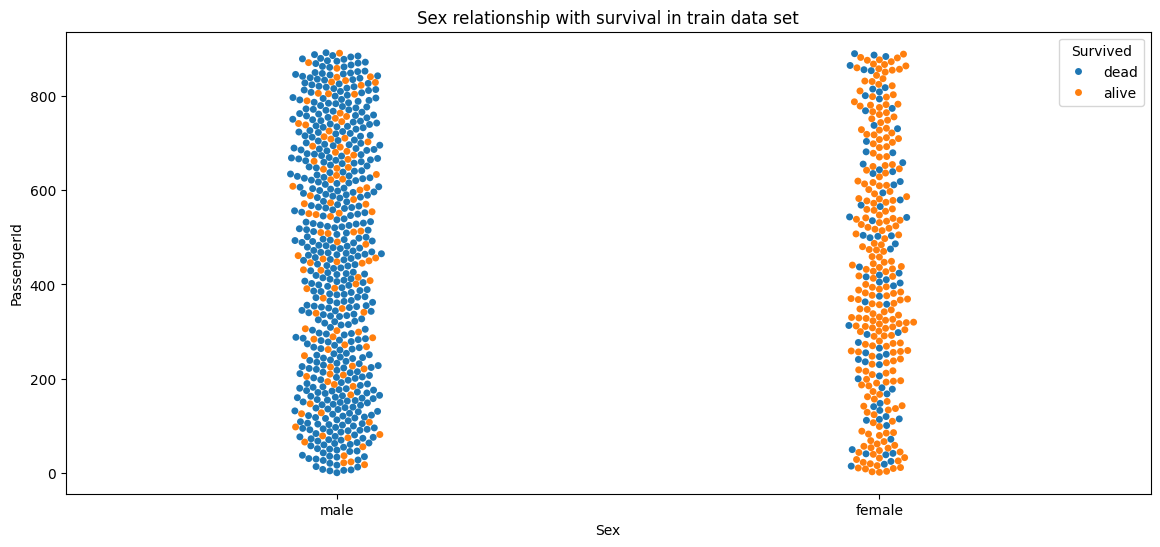

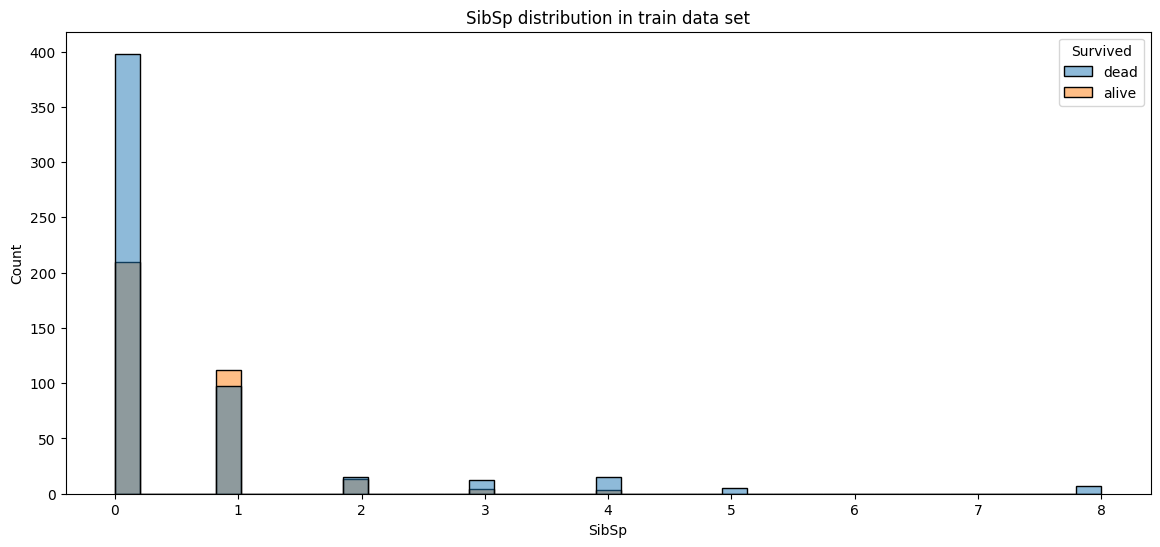

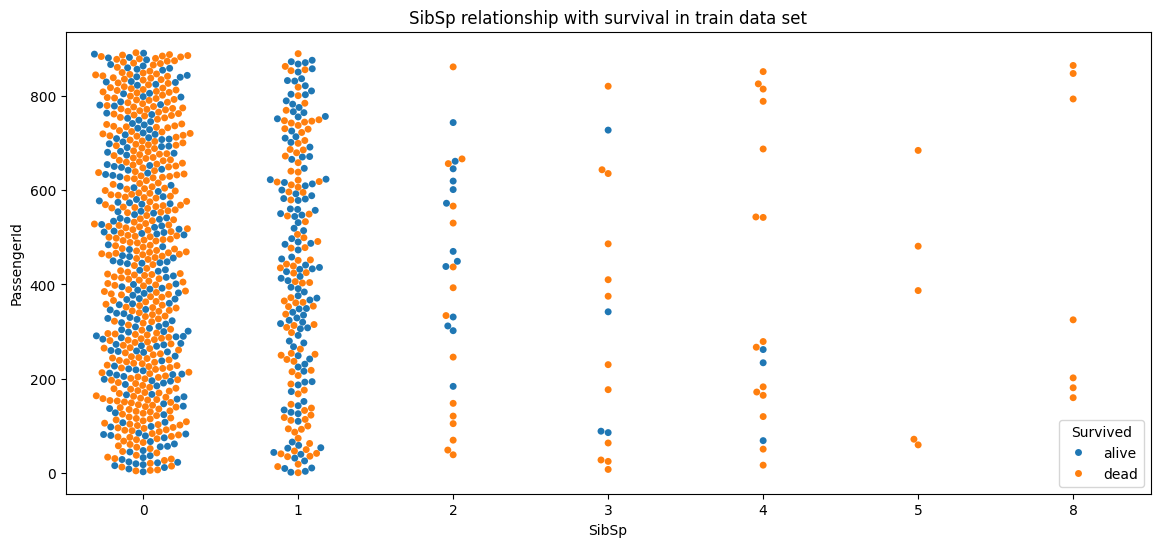

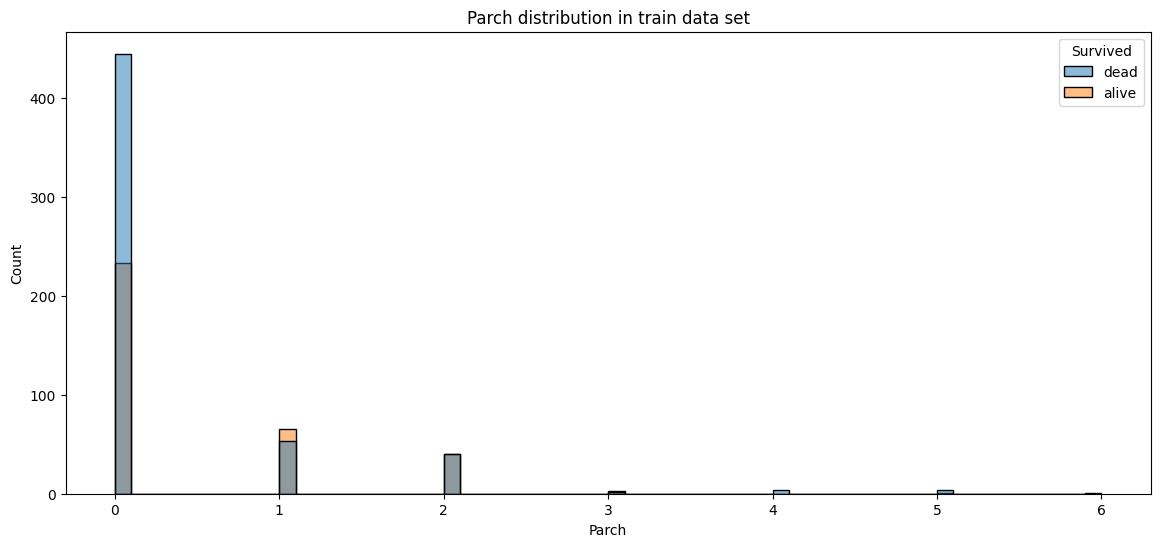

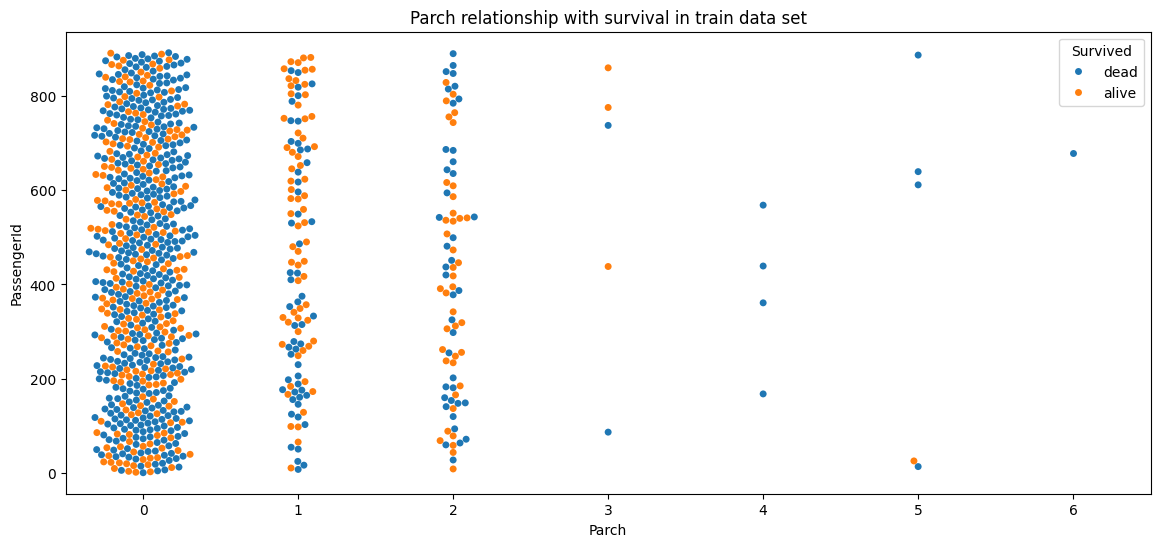

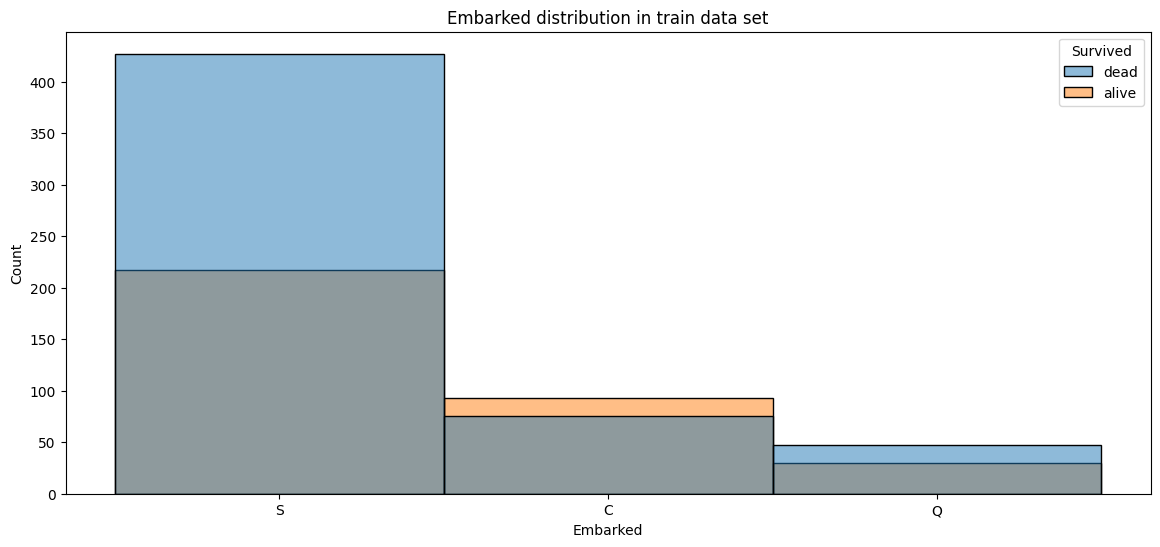

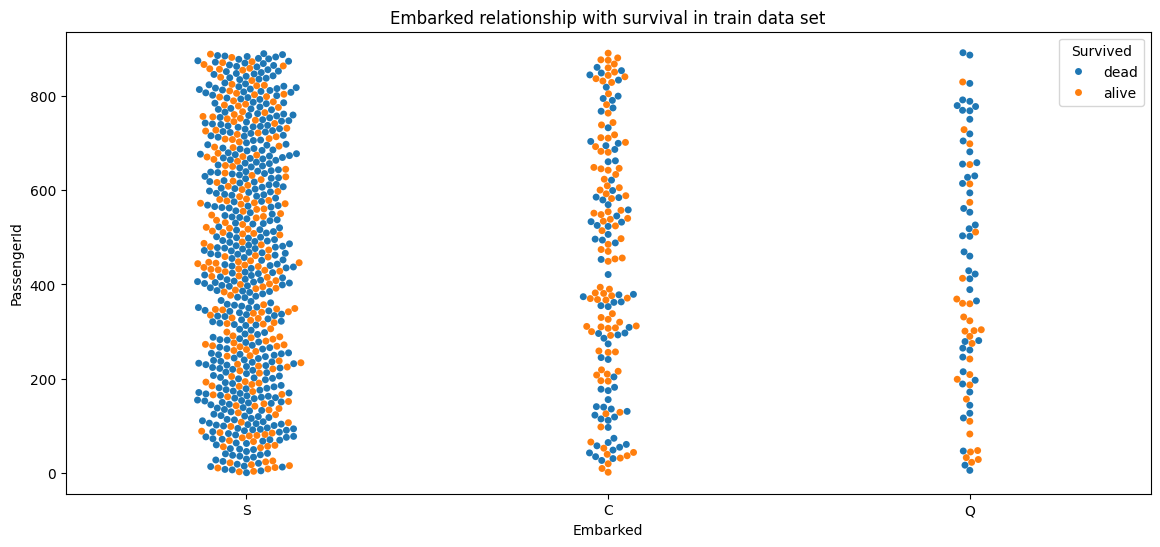

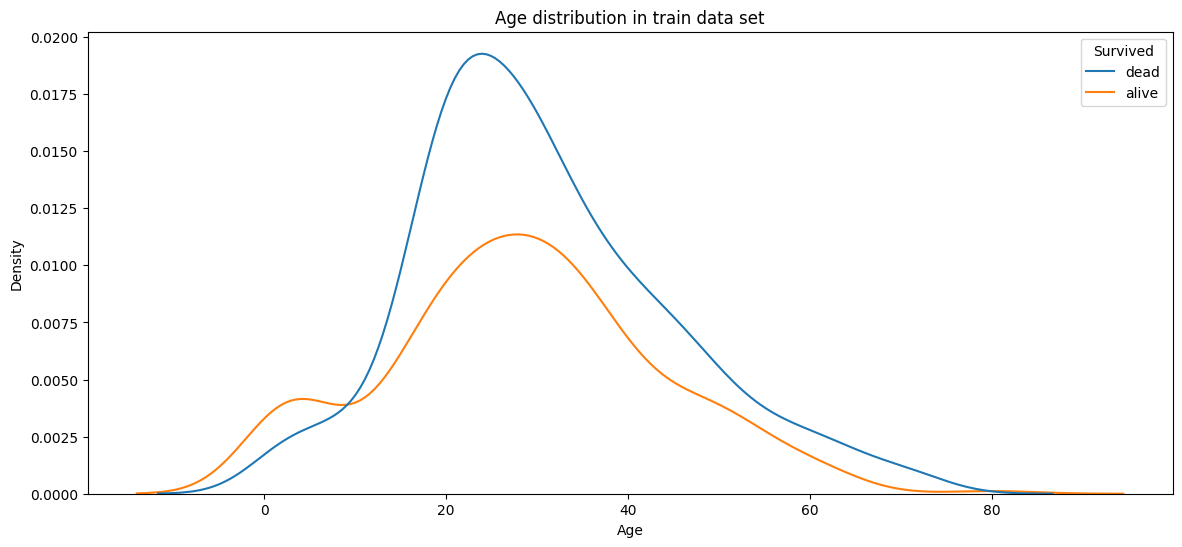

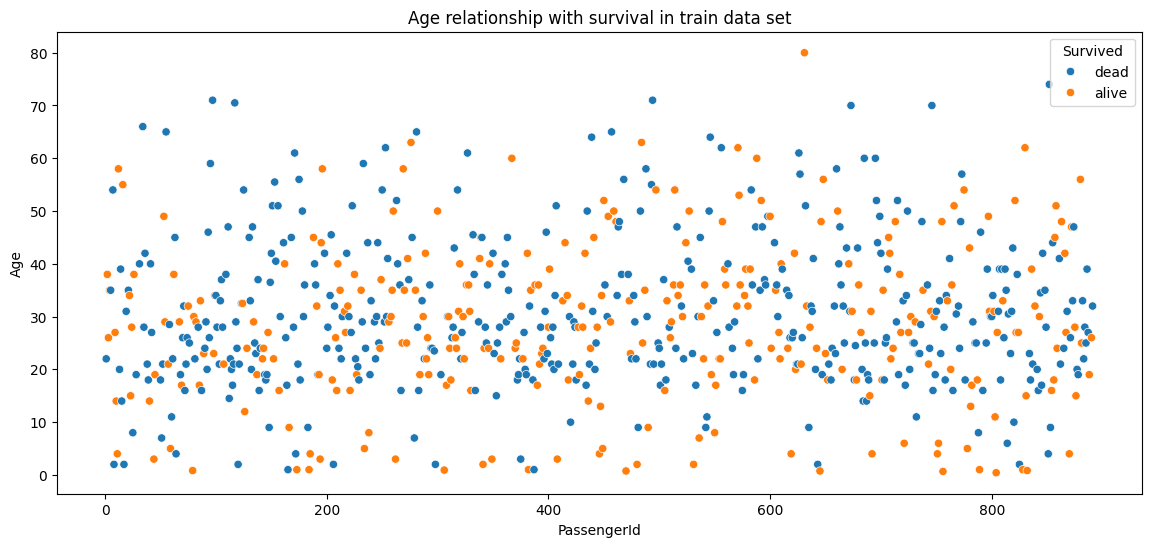

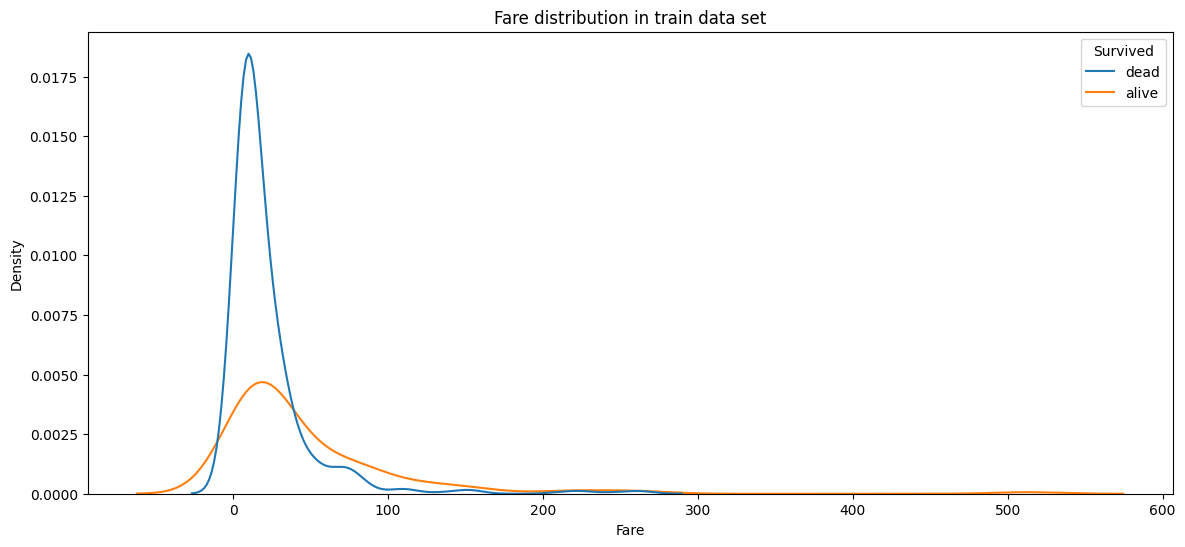

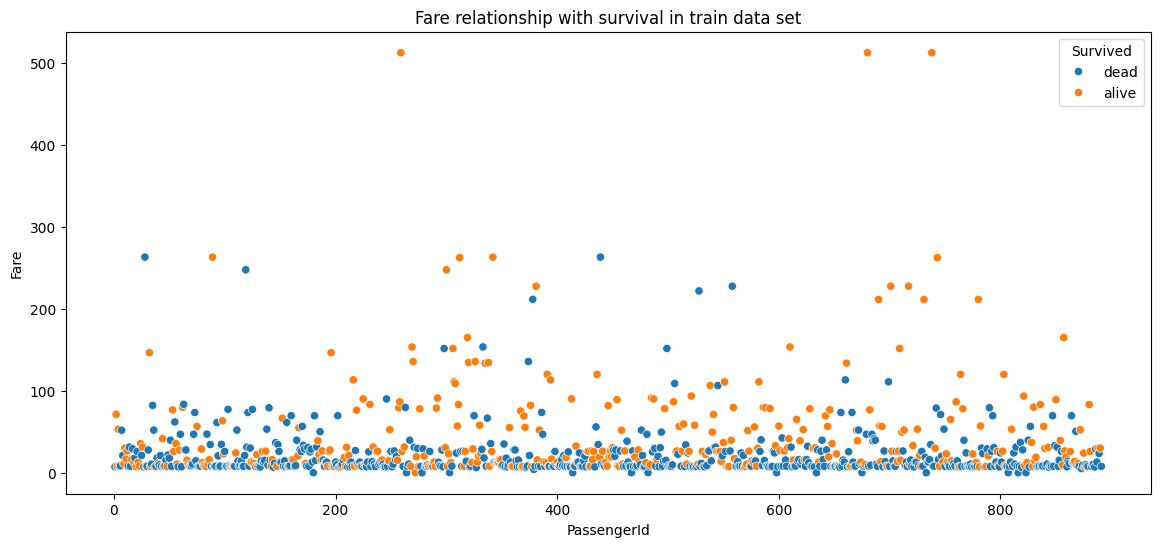

In [3]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

continuous_values = ["Age", "Fare"]
categorical_value = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

def explore_data_visualization(df: pd.DataFrame):
    # Transform the survival from 0/1 value to dead/alive for easier visualization
    copied = df.copy()
    copied["Survived"] = copied["Survived"].map(lambda s: "alive" if s == 1 else "dead")

    for col in categorical_value:
        plt.figure(figsize=(14, 6))
        plt.title(f"{col} distribution in train data set")
        sns.histplot(data=copied, x=col, hue="Survived")
        # plt.savefig(f"./data/visualization/{col}_distribution.png")
        print(f"{col} distribution visualization complete")

        plt.figure(figsize=(14, 6))
        plt.title(f"{col} relationship with survival in train data set")
        sns.swarmplot(data=copied, x=col, y="PassengerId", hue="Survived")
        # plt.savefig(f"./data/visualization/{col}_relationship.png")
        print(f"{col} relationship visualization complete")
    
    for col in continuous_values:
        plt.figure(figsize=(14, 6))
        plt.title(f"{col} distribution in train data set")
        sns.kdeplot(data=copied, x=col, hue="Survived")
        # plt.savefig(f"./data/visualization/{col}_distribution.png")
        print(f"{col} distribution visualization complete")

        plt.figure(figsize=(14, 6))
        plt.title(f"{col} relationship with survival in train data set")
        sns.scatterplot(data=copied, y=col, x="PassengerId", hue="Survived")
        # plt.savefig(f"./data/visualization/{col}_relationship.png")
        print(f"{col} relationship visualization complete")

explore_data_visualization(train_data)

From those inspection above, we can see some interseting insights:

- Only `Age` and `Cabin` has missing/Nan values (~20% and ~77% respectively).
- Third class has the highest rate of dead, while being 1st class has higher rate of survival
- Female have a higher rate of survival
- Age around 20-40 is the main stream, and people at this range also have more chance of death. Children has higher rate of survival
- Embarked `C` has a higher chance of surviving than `S`
- Those that travel alone (no sibling + no parent) have more dead rate, while those that has **exactly** 1 sibling and parent does have higher rate of survival. Having more sibs/parents actually decrease the survival rate

If we look further at `Name`, `Ticket` and `Cabin` (which are values we previously ignore because they are too diversed), we can see some interesting patterns:

- `Name` can have honorifics include (Mr, Miss, Don,...), which express social status. This information may be valuable, as we can see that, even being 1st class (`Pclass`), you still have quite a chance of not surviving.
- `Ticket`, can be prefix with a some string, while others simply a number
- `Cabin` has a lot of missing values, so we can create a new features (`has_cabin`) and see if we can extract some insights. Also, all `Cabin` has a prefix (which is a deck), which is also valuable (those who stay at the same deck are likely to be dead/alive together?)


In [77]:
# Extract honorific from Name
def extract_honorific(name):
    return name.split(",")[1].split(".")[0].strip()

def data_transformation(df: pd.DataFrame) -> pd.DataFrame:
    copied = df.copy()
    copied["Title"] = copied["Name"].map(lambda name: extract_honorific(name))
    return copied

# Add 2 new columns we found (since this is just adding new columns without modifying old data, we can just do it without copying)
train_data = data_transformation(train_data)
# data_transformation(test_data)

Title distribution visualization complete
Title relationship visualization complete


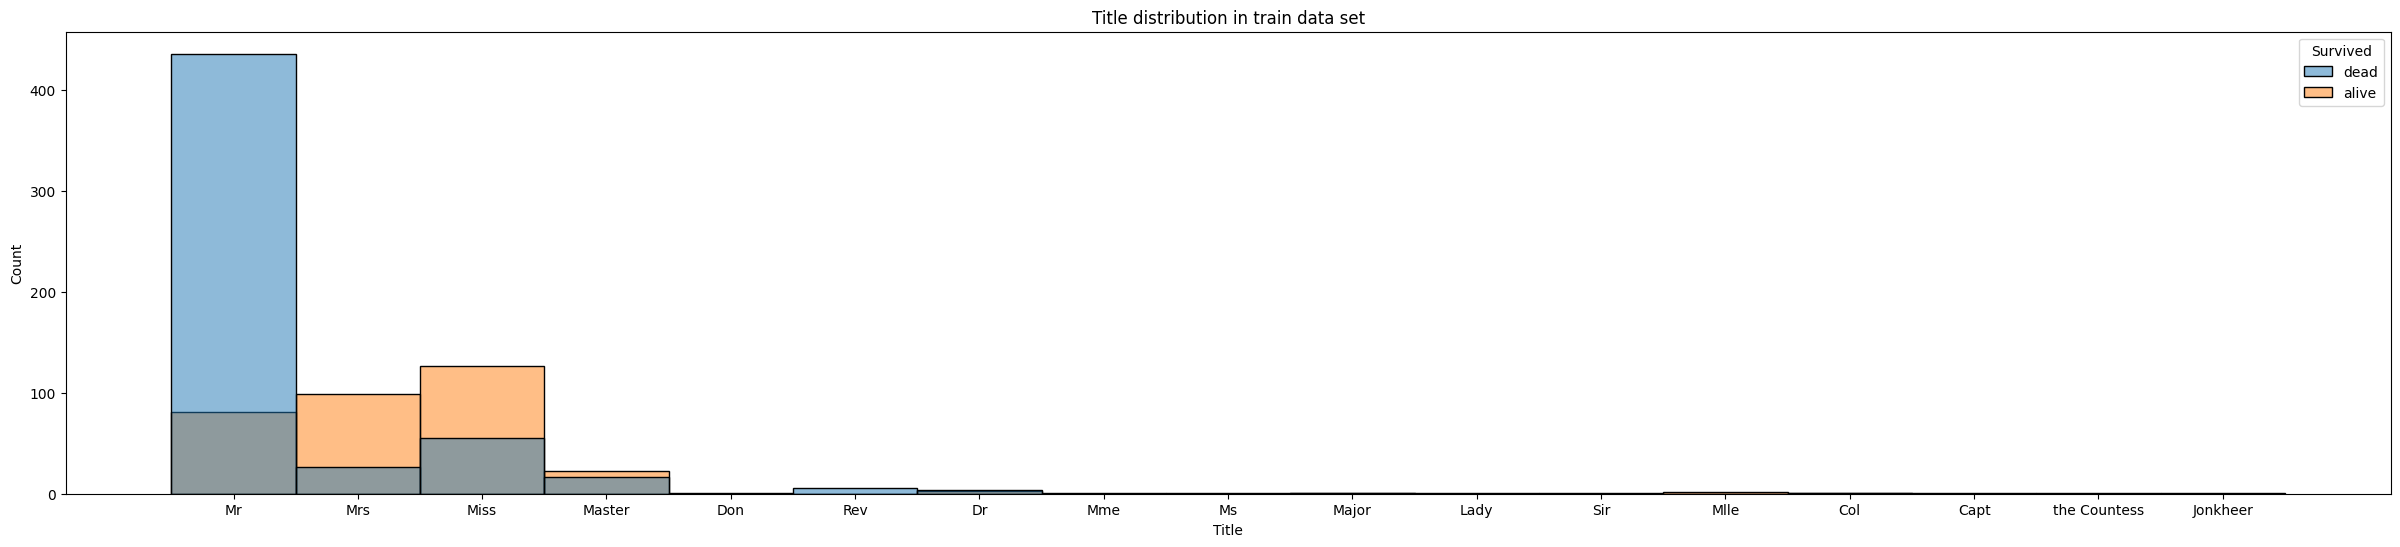

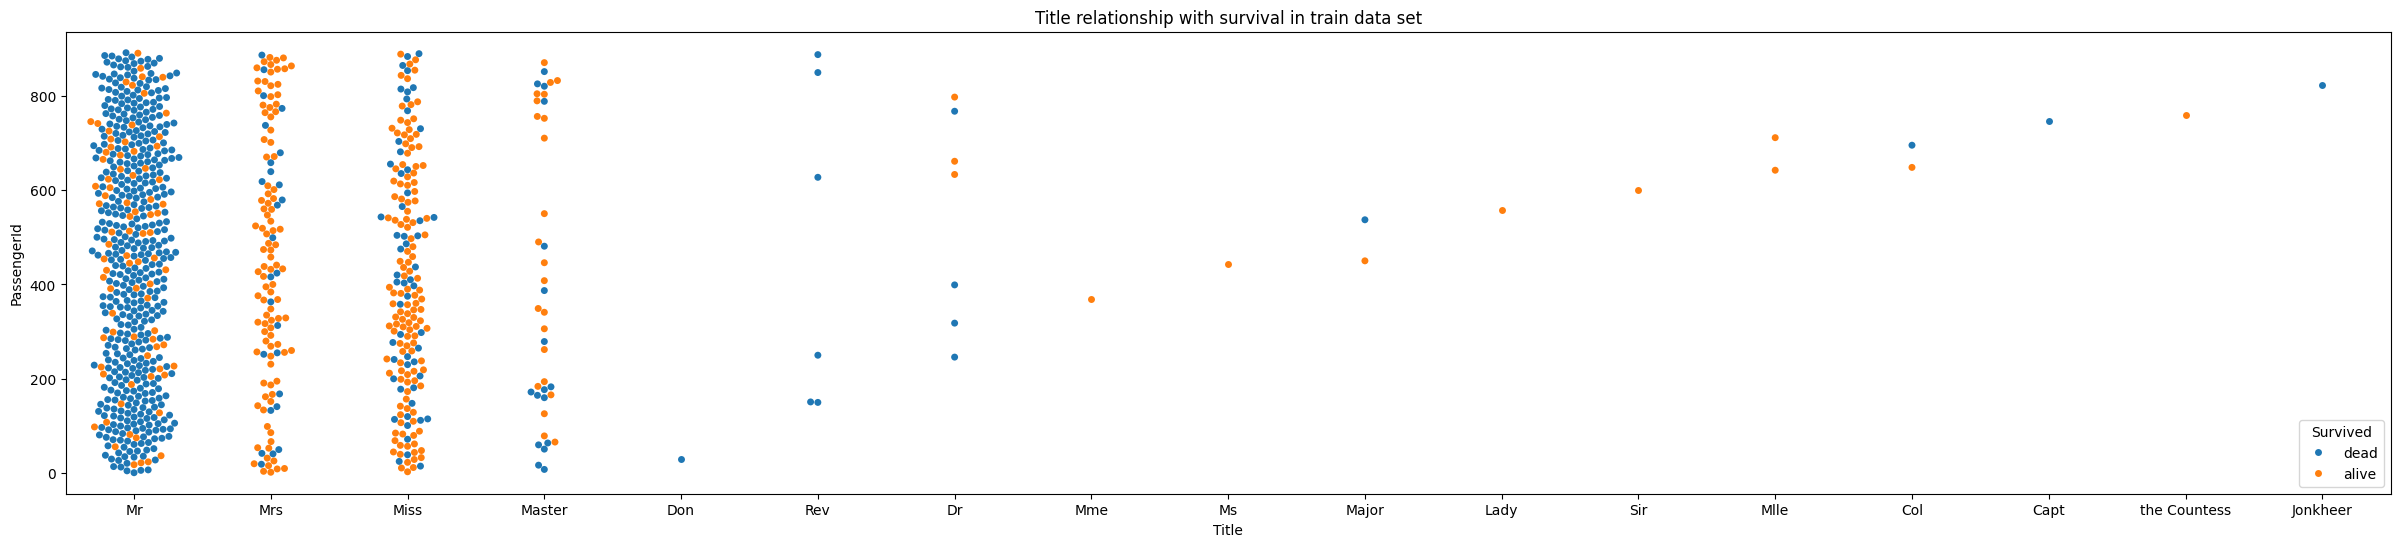

In [83]:
def visualize_pattern_features(df: pd.DataFrame) -> None:
    # Make a copy of data frame
    copied = df.copy()
    copied["Survived"] = copied["Survived"].map(lambda s: "alive" if s == 1 else "dead")

    # Visualize on new features
    new_features = ["Title"]
    for col in new_features:
        plt.figure(figsize=(30, 6))
        plt.title(f"{col} distribution in train data set")
        sns.histplot(data=copied, x=col, hue="Survived")
        # plt.savefig(f"./data/visualization/{col}_distribution.png")
        print(f"{col} distribution visualization complete")

        plt.figure(figsize=(30, 6))
        plt.title(f"{col} relationship with survival in train data set")
        sns.swarmplot(data=copied, x=col, y="PassengerId", hue="Survived")
        # plt.savefig(f"./data/visualization/{col}_relationship.png")
        print(f"{col} relationship visualization complete")

visualize_pattern_features(train_data)

## Train model

First, we will create our `Pipeline`, `X` (training features) and `y` (prediction targets)

In [98]:
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Configuration for model
random_state = 777
train_size = 0.8
n_estimators = 500

# The features we choose for training, can be adjusted. It can either from original features, or from feature engineering
training_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Embarked"]

# Create a pipeline
def get_pipeline(df: pd.DataFrame) -> Pipeline:
    # Get the list of numerical and categorical columns out of features
    numerical_cols, categorical_cols = [], []
    for col in training_features:
        if is_numeric_dtype(df[col]):
            numerical_cols.append(col)
            # print(f"numerical_cols: {col}")
        elif df[col].dtype == "object":
            categorical_cols.append(col)
            # print(f"categorical_cols: {col}")

    # Initialize transformers for numerical and categorical columns
    numerical_transformer = SimpleImputer(strategy="constant")
    categorical_transformer = Pipeline(
        steps=[
            # Step 1: if meet missing values, choose the most frequent value to fill in
            ("imputer", SimpleImputer(strategy="most_frequent")),
            # Step 2: use One-Hot encoder to map string to numerical values
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]
    )

    # Initialize preprocessor with the transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_transformer, numerical_cols),
            ("cat", categorical_transformer, categorical_cols),
        ]
    )

    # Initialize model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Initialize pipeline. With pipeline, data will be preprocessed automatically before fit/predict
    pipeline = Pipeline(steps=[("preprocessed", preprocessor), ("model", model)])
    print("create pipeline success")
    return pipeline

# Create pipeline
pipeline = get_pipeline(train_data)

# Create X and y
X, y = train_data[training_features], train_data[prediction_target]


create pipeline success


Train model using traditional splitting with `train_test_split` method: 

In [56]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
)

# Train model 
def train_model(pipeline: Pipeline, X: pd.DataFrame | pd.Series, y: pd.DataFrame | pd.Series) -> None:
    # Split data set into training set and validation set
    train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=train_size, random_state=random_state)

    # Fit model with train data set
    pipeline.fit(train_X, train_y)

    # Validate model using validation set
    predictions = pipeline.predict(val_X)

    # Compare predictions with actual value
    print("Evaluation: ")
    print(f"accuracy_score: {accuracy_score(val_y, predictions)}")
    print(f"precision_score: {precision_score(val_y, predictions)}")

train_model(pipeline, X, y)


Evaluation: 
accuracy_score: 0.8044692737430168
precision_score: 0.7288135593220338


Train model using cross validation

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names

# Use cross validation to train model 
def cross_validation(pipeline: Pipeline, X: pd.DataFrame | pd.Series, y: pd.DataFrame | pd.Series, cv: int, scoring_metric: str) -> None:
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring_metric)
    print("cross validation results:")
    print(f"metric: {scoring_metric}")
    print(f"results: {scores}, mean: {scores.mean()}")

# Use this method to see all the scoring metrics values
# print(get_scorer_names())

cv = 5 # Adjustable
scoring_metric = "accuracy" # See all the metrics at
cross_validation(pipeline, X, y, cv, scoring_metric)

cross validation results:
metric: accuracy
results: [0.83240223 0.8258427  0.84269663 0.79775281 0.83146067], mean: 0.8260310087251271


## Get output for submission

With our trained model, now let's predict on the actual test data set, create result and submit on Kaggle.

In [100]:
# Create prediction on test set and output submission.csv file for submission
def get_output(
    pipeline: Pipeline,
    test_df: pd.DataFrame,
    X: pd.DataFrame | pd.Series,  # This is from the training data set
    y: pd.DataFrame | pd.Series,  # This is from the training data set
) -> None:
    # Retrain model using the entire training data set
    pipeline.fit(X, y)

    # Make predictions
    predictions = pipeline.predict(test_df[training_features])

    # Output result to CSV
    output = pd.DataFrame(
        {
            "PassengerId": test_df.PassengerId,
            "Survived": predictions,
        }
    )
    output.to_csv(output_file_path, index=False)
    print("Output submission.csv success")

test_data = data_transformation(test_data)
get_output(pipeline, test_data, X, y)

Output submission.csv success
